

# $$Phase-1$$
#### Author: PARTH NAWKAR


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
plt.rcParams["figure.figsize"]=(12,10) ##to increase graph size

In [5]:
a ,b = np.mgrid[-2:2:20j, -2:2:20j] ## x y coordinates 

### PART 1

### Velocity field


In [6]:
def vel_1(x,y): ## velocity field function
    
# ANOTHER METHOD
   ## zero_circle_matrix = np.ones_like(r)
   ## for i in range(20):
   ##     for j in range(20):
   ##         if (r[i,j] < zero_circle_matrix[i,j]):
   ##            zero_circle_matrix[i,j] = 0
   
   ##u = zero_circle_matrix*(((x*x-y*y-1)*((x*x-y*y)+4*x*x*y*y))/(r*r*r*r))
   ##v = zero_circle_matrix*(-2*x*y/(r*r*r*r))
   
# BETTER METHOD
    r = np.sqrt(x*x+y*y) #radius
    u = ((x*x-y*y-1)*(x*x-y*y)+4*x*x*y*y)/(r*r*r*r)
    v = (-2*x*y/(r*r*r*r))
    u[r < 1] = 0
    v[r <1] = 0    
        
    return np.array([u,v])

In [7]:
p,q = vel_1(a,b) # collection x and y components of velocity at each coordinate

(-2.2, 2.2, -2.2, 2.2)

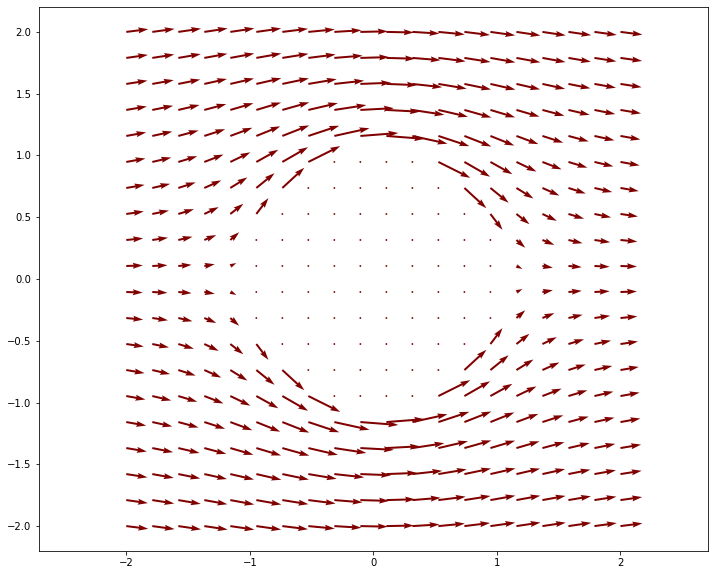

In [8]:
plt.clf()
plt.quiver(a,b,p,q,color= "maroon") #maroon color :)
plt.axis('equal') # makes axis equal

### Pathlines

In [9]:
def vel_pathlines_1(rv,t): #defined a velocity function for pathlines
    x,y = rv[0], rv[1]
    
    r = np.sqrt((x**2+y**2))
    u = ((x*x-y*y-1)*(x*x-y*y)+4*x*x*y*y)/(r*r*r*r)
    v = (-2*x*y/(r*r*r*r))
    return np.array([u,v])

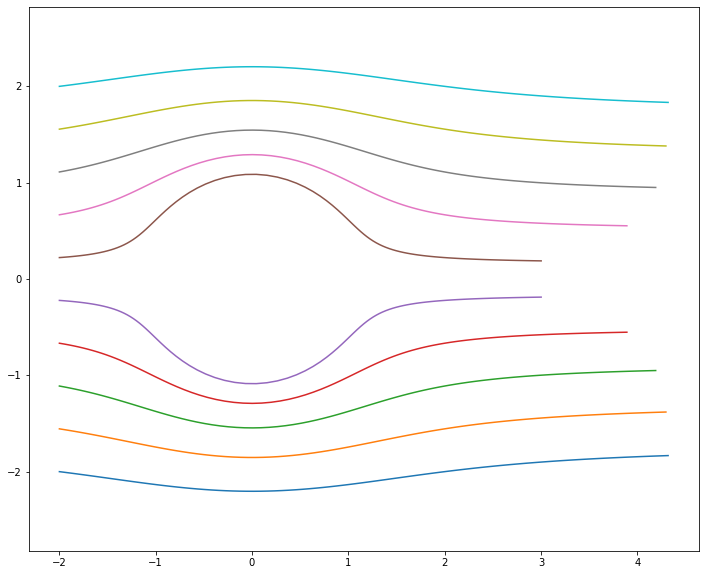

In [10]:
Iys = np.mgrid[-2:2:10j] # ordinates of 10 points lying on x = -2

for i in Iys:
    times = np.linspace(0,6,100)
    ic = np.array([-2,i])
    px, py = odeint(vel_pathlines_1, ic, times).T # .T is for taking transpose
    plt.plot(px,py)
    plt.axis('equal')

### Streaklines

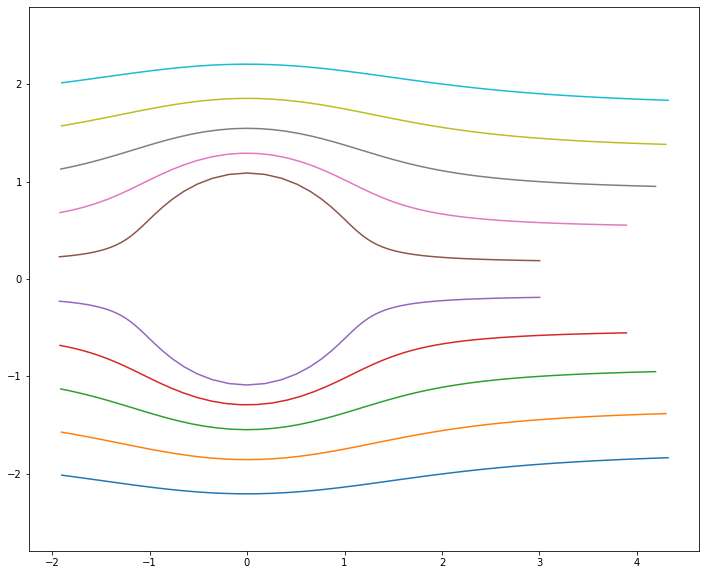

In [11]:

for i in Iys:  
    ic_particle = np.array([-2,i])                               # initial condition on particles starting at x = -2
    dt = 0.1
    n = 60
    T = n*dt                                                     # time = 6 seconds
    sx, sy = [], []
    for j in range(n):
        start = j*dt                                             # releasing next particle at a given coordinate after dt time
        res = odeint(vel_pathlines_1, ic_particle, [start, T])   # integrating its trajectory from its start to time T
        sx.append(res[1,0])
        sy.append(res[1,1])
    
    plt.plot(sx, sy)
    plt.axis('equal');


### Streamlines


In [12]:
Iyst = np.mgrid[-2:2:10j]
def vel_streamlines_1(r,t):
    return vel_pathlines_1(r,t) ## as velocity function is time independent so freezing velocity field at any given time 
                                ## to plot streamlines will remain the same function 

def plot_vel_st(t,k):   # defined a function to plot streamlines.  
                        # t represtents time in seconds, k represents the postion of graph in subplot

    for i in Iyst:
        times = np.linspace(0,6,100)
        ic = np.array([-2,i])
        px, py = odeint(vel_streamlines_1, ic, times).T
        plt.subplot(2,2,k)
        plt.title('Streamlines at t =' +str(t)+ 'sec')
        plt.plot(px,py)
        plt.axis('equal')

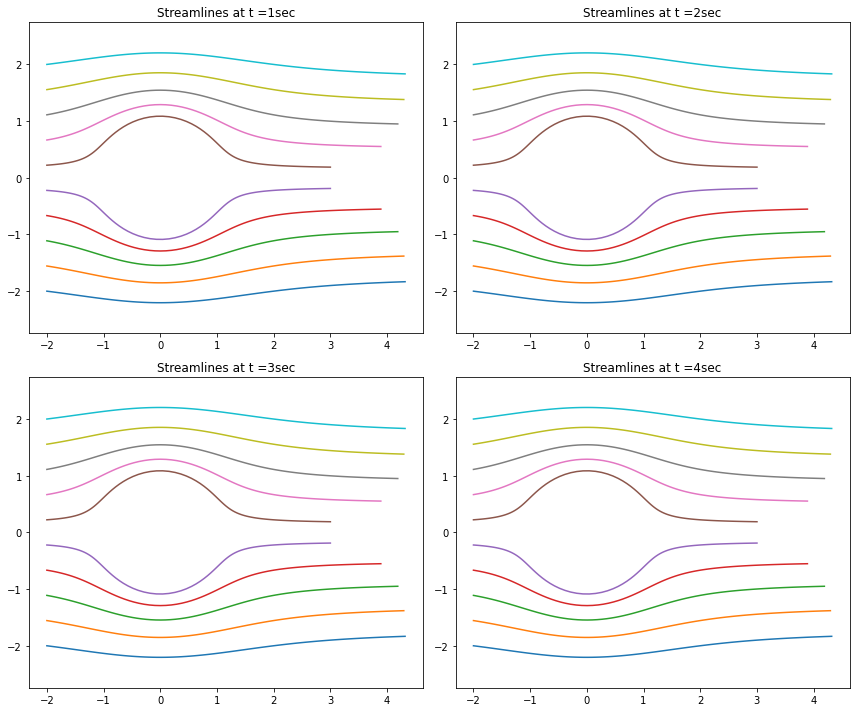

In [13]:
for j in range (4): #ploting streamlines at 4 different times
    plot_vel_st(j+1,j+1)
plt.tight_layout()

#### DESCRIPTION OF FLOW :

 * SINCE STREAMLINES, PATHLINES AND STREAKLINES ARE TIME INDEPENDENT WE CAN CONCLUDE THAT THE FLOW IS STEADY
 * WHICH ALSO APPEARS TO BE LIKE FLOW OF WIND ACROSS A SPHERE KEPT IN A WIND TUNNEL 

# PART 2 

In [14]:
def vel_2(x,y,t): ## velocity field function
    #x=rv[0]
    #y=rv[1]
    x_ = x + t
    r = np.sqrt(x_**2 + y**2)
    u = -(x_**2 - y**2)/(r**4)
    v = (-2*x_*y)/(r**4)
    u[r<1] = 0 # neglecting region where velocity vectors spike up enormously
    v[r<1] = 0 # as when r tends to zero, velocity aprroches infinity
    
    return np.array([u,v])

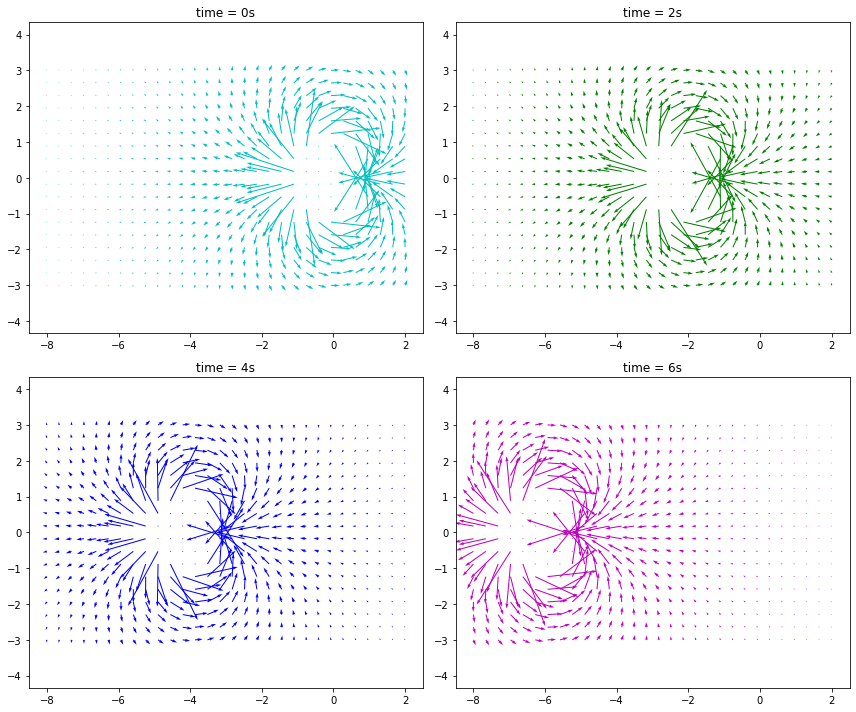

In [15]:
a1,b1 = np.mgrid[-8:2:30j, -3:3:18j] # considering the area where the flow is varying over thee given time interval of 6 seconds

p1,q1 = vel_2(a1,b1,0)
p2,q2 = vel_2(a1,b1,2)
p3,q3 = vel_2(a1,b1,4)
p4,q4 = vel_2(a1,b1,6)

plt.clf()
plt.subplot(2,2,1)
plt.quiver(a1,b1,p1,q1, color = "c")
plt.axis('equal')
plt.title('time = 0s')

plt.subplot(2,2,2)
plt.quiver(a1,b1,p2,q2, color = "g")
plt.axis('equal')
plt.title('time = 2s')

plt.subplot(2,2,3)
plt.quiver(a1,b1,p3,q3, color = "b")
plt.axis('equal')
plt.title('time = 4s')

plt.subplot(2,2,4)
plt.quiver(a1,b1,p4,q4 ,color = "m")
plt.axis('equal')
plt.title('time = 6s')

plt.tight_layout()

### Pathlines

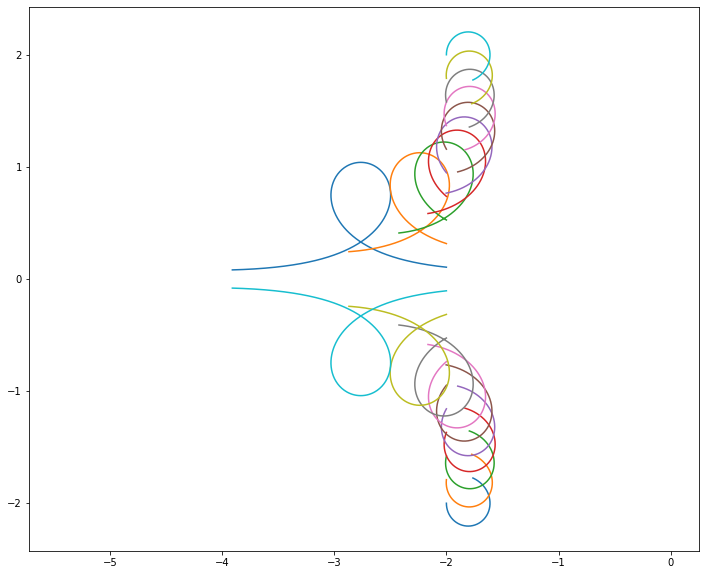

In [16]:
def vel_pathlines_2(rv,t): # defined a velocity function for pathlines

    x=rv[0]
    y=rv[1]
    x_ = x + t
    r = np.sqrt(x_**2 + y**2)
    u = -(x_**2 - y**2)/r**4
    v = (-2*x_*y)/r**4
    return u,v


Iys2 = np.mgrid[-2:2:20j] # ordinates of 20 points lying on x = -2

for i in Iys2:
    times = np.linspace(0,10,1000) # plotting the path of particles over 10 seconds
    ic = np.array([-2,i])
    px, py = odeint(vel_pathlines_2, ic, times).T
    plt.plot(px,py)
    plt.axis('equal') # scales axes equally

### Streaklines

In [17]:
def vel_streaklines2(rv,t): # defined a velocity function for straklines
    x=rv[0]
    y=rv[1]
    x_ = x + t
    r = np.sqrt(x_**2 + y**2)
    if (r > 1): 
        u = -(x_**2 - y**2)/r**4
        v = (-2*x_*y)/r**4
    else :
        u,v = 0,0 # neglecting region where r approches zero and velocity aprroches infinity
    return u,v


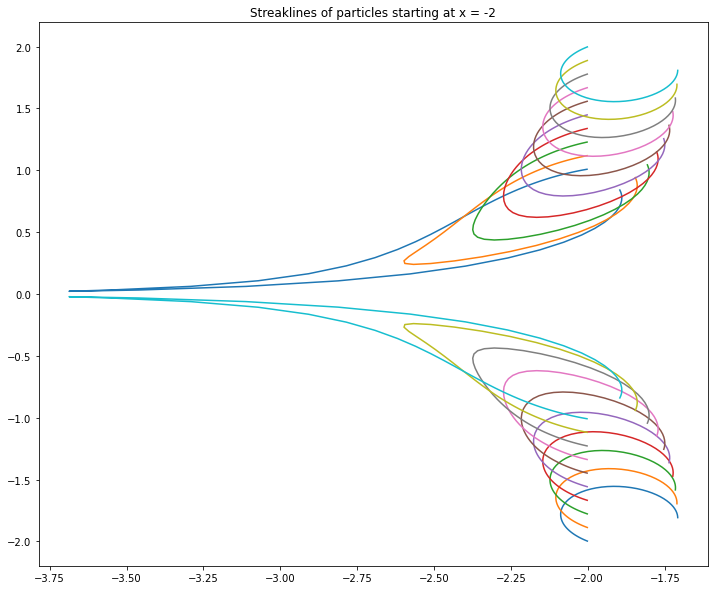

In [18]:
Iystr2 = np.mgrid[-2:-1.01:10j]             # ordinate of 20 particles on x = -2
Iystr2_1 = np.mgrid[1.01:2:10j]             # removing the points between -1, 1 as higher velocity in this region cause irregularities in plot 
Iystr = np.concatenate((Iystr2_1, Iystr2))  # [-2,-1] U [1,2] # np.concatenate merges two arrays
for i in Iystr:  
    ic_st = np.array([-2,i])
    dt = 0.1
    n = 70
    T = n*dt                                # time = 7 seconds
    sx2, sy2 = [], []
    for j in range(n):
        start = j*dt
        res = odeint(vel_streaklines2, ic_st, [start, T])
        sx2.append(res[1,0])
        sy2.append(res[1,1])

    plt.title("Streaklines of particles starting at x = -2")
    plt.plot(sx2, sy2)
   # plt.axis('equal')

### Streamlines

In [19]:
                                    # velocity function for streamlines
def vel_st_asec(rv,t,a):            # additional argument 'a' to redine velocity function( freeze at time 'a')
    x=rv[0]
    y=rv[1]
    x_ = x + a
    r = np.sqrt(x_**2 + y**2)
    if (r > 1): 
        u = -(x_**2 - y**2)/r**4
        v = (-2*x_*y)/r**4
    else :
        u,v = 0,0
    return u,v


def plot_stlines(j,k): # function to plot streamlines j represents time instant, and k represnts the position in subplot
    Iystreamlines2 = np.mgrid[-2:2:20j] # ordinate of 20 particles on x = -2
    for i in Iystreamlines2:
        times = np.linspace(0,10,100)
        ic = np.array([-2,i])
        px2, py2 = odeint(vel_st_asec, ic, times, args=(j,)).T # args=(j,) to account for the additional argument
        plt.subplot(3,2,k)
        plt.title('Streamlines at t =' +str(j)+ 'sec')
        plt.plot(px2,py2)
        plt.tight_layout()
       # plt.axis('equal') ## turned off scaling axes equal to observe streamlines better

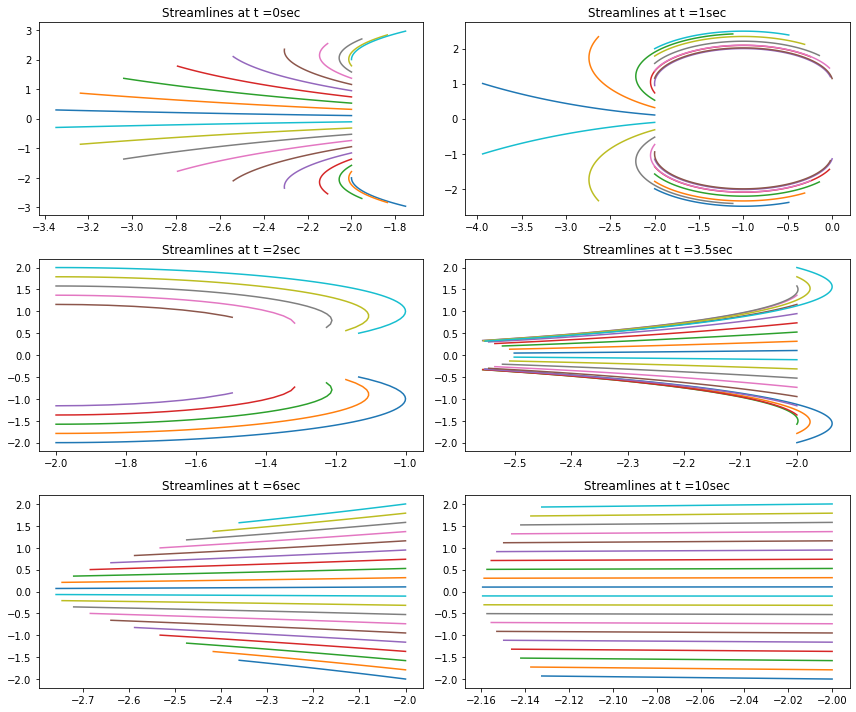

In [20]:
plot_stlines(0,1)
plot_stlines(1,2)
plot_stlines(2,3)
plot_stlines(3.5,4)
plot_stlines(6,5)
plot_stlines(10,6)

#### DESCRIPTION OF FLOW
* Since STREAMLINES are TIME DEPENDENT we can conclude that the FLOW IS UNSTEADY
* Flow appears similar to the one that is caused by a vortex or some stage of imploding bubble in water (Velocity spikes can be understood as microjet) 
